(372, 341)


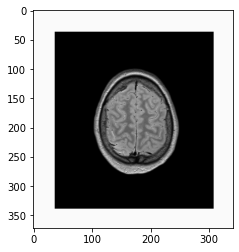

[[255.         255.         253.41950626 ... 255.         255.
  255.        ]
 [255.         255.         255.         ... 255.         253.72054238
  255.        ]
 [255.         250.71333453 255.         ... 255.         255.
  255.        ]
 ...
 [255.         255.         255.         ... 255.         255.
  255.        ]
 [252.7419846  255.         255.         ... 255.         255.
  251.38705498]
 [255.         255.         255.         ... 255.         255.
  251.83523075]]


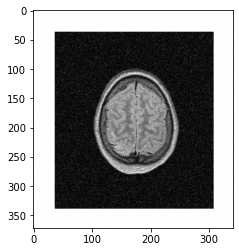

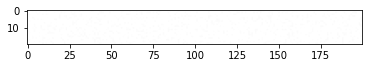

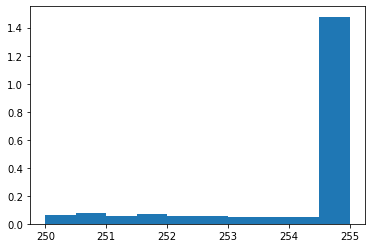

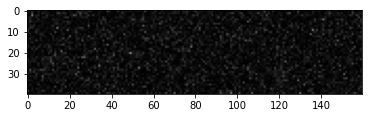

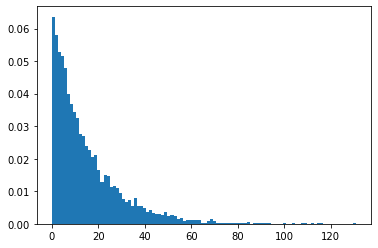

In [56]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('MRI.png', 0)

x = img.shape[0]
y = img.shape[1]

img = cv.copyMakeBorder(img, x//4, y//4, x//4, y//4, cv.BORDER_CONSTANT, None, value = 0)

x = img.shape[0]
y = img.shape[1]

image = cv.copyMakeBorder(img, x//8, y//8, x//8, y//8, cv.BORDER_CONSTANT, None, value = 250)
x = image.shape[0]
y = image.shape[1]

print(image.shape)
plt.imshow(image, cmap='gray')
plt.show()

gfg = np.random.exponential(15, (x,y))

image = image + gfg 
image = np.clip(image , 0 , 255)

cv.imwrite('MRI_Noisy.png', image)
plt.imshow(image, cmap='gray', vmin = 0, vmax=255)
print(image)
plt.show()

image1 = image[0:20 , 0:200]
plt.imshow(image1, cmap='gray', vmin = 0 , vmax = 255)
plt.show()


plt.hist(image1.ravel(), 10, density = True, 
         histtype ='bar')
plt.show()

image1 = image[40:80 , 40:200]
plt.imshow(image1, cmap='gray', vmin = 0 , vmax = 255)
plt.show()
colors = ['green', 'blue', 'lime']

plt.hist(image1.ravel(), 100, density = True, 
         histtype ='bar')

#print(gfg)
#count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()

In [ ]:
img = cv.imread('noisy_dental.png',0)
img1 = img[0:100,0:200]

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')

plt.subplot(2,3,4)
plt.hist(img1.ravel(), bins = 256 , range = (0,255) , density = True ,stacked = True)
plt.ylim(0, 0.25)

mean = img1.mean()
varience = img1.var()
print('mean',mean)
print('varience',varience)



padding_img = cv.copyMakeBorder(img, 4, 4, 4, 4 , cv.BORDER_REPLICATE) 

adaptive_filtred_img=np.zeros(img.shape , dtype='float64')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        window = padding_img[i:i+9 , j:j+9]
        local_var=window.var()
        local_mean=window.mean()
        adaptive_filtred_img[i,j] = img[i,j] - (varience/local_var)*(img[i,j]-local_mean)

adaptive_filtred_img = np.array(adaptive_filtred_img , dtype='uint8')
plt.subplot(2,3,2)
plt.imshow(adaptive_filtred_img , cmap='gray')


adaptive_filtred_img1 = adaptive_filtred_img[0:500,0:10]
plt.subplot(2,3,5)
plt.hist(adaptive_filtred_img1.ravel(), bins = 256 , range = (0,255) , density = True , stacked = True)
plt.ylim(0, 0.25)

median_filtred_img = cv.blur(img,(9,9))
plt.subplot(2,3,3)
plt.imshow(median_filtred_img , cmap='gray')


median_filtred_img1 = median_filtred_img[0:500,0:10]
plt.subplot(2,3,6)
plt.hist(median_filtred_img1.ravel(), bins = 256 , range = (0,255) , density = True , stacked = True)
plt.ylim(0, 0.25)

#cv.imshow('img',img)
#cv.imshow('adaptive',adaptive_filtred_img)
#cv.imshow('median',median_filtred_img)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()